In [3]:
# libraries
from dotenv import load_dotenv
import os
from tavily import TavilyClient

# load environment variables from .env file
_ = load_dotenv()

# connect
client = TavilyClient(api_key=os.environ.get("TAVILY_API_KEY"))

In [4]:
# run search
result = client.search("What is in Nvidia's new Blackwell GPU?",
                       include_answer=True)

# print the answer
result["answer"]


'The new Blackwell GPU by Nvidia features the Grace Blackwell GB200 superchip and GB200 NVL72, which provide 30 times more performance and 25 times more energy efficiency compared to its predecessor. It is described as the "world\'s most powerful chip" designed for AI, boasting 208 billion transistors and offering significant cost and energy savings for AI inference operations. Several major organizations, including Amazon Web Services, Google, Microsoft, and others, are expected to adopt the Blackwell platform.'

## Regular search

In [5]:
# choose location (try to change to your own city!)

city = "San Francisco"

query = f"""
    what is the current weather in {city}?
    Should I travel there today?
    "weather.com"
"""

> Note: search was modified to return expected results in the event of an exception. High volumes of student traffic sometimes cause rate limit exceptions.

In [8]:
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
import re

ddg = DDGS()

def search(query, max_results=6):
    try:
        results = ddg.text(query, max_results=max_results)
        return [i["href"] for i in results]
    except Exception as e:
        print(f"returning previous results due to exception reaching ddg.")
        results = [ # cover case where DDG rate limits due to high deeplearning.ai volume
            "https://weather.com/weather/today/l/USCA0987:1:US",
            "https://weather.com/weather/hourbyhour/l/54f9d8baac32496f6b5497b4bf7a277c3e2e6cc5625de69680e6169e7e38e9a8",
        ]
        return results  


for i in search(query):
    print(i)

https://weather.com/weather/today/l/San+Francisco+CA+USCA0987
https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=45cf83277ba620e7dc8a0fe8b6eda89925a3e6d2e1bdfef3f74a1590017bd70d


In [9]:
def scrape_weather_info(url):
    """Scrape content from the given URL"""
    if not url:
        return "Weather information could not be found."
    
    # fetch data
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the webpage."

    # parse result
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

> Note: This produces a long output, you may want to right click and clear the cell output after you look at it briefly to avoid scrolling past it.

In [11]:
# use DuckDuckGo to find websites and take the first result
url = search(query)[0]

# scrape first wesbsite
soup = scrape_weather_info(url)

print(f"Website: {url}\n\n")
print(str(soup.body)[:50000]) # limit long outputs

Website: https://weather.com/weather/today/l/San+Francisco+CA+USCA0987


<body><div class="appWrapper DaybreakLargeScreen LargeScreen lightTheme twcTheme DaybreakLargeScreen--appWrapper--ZkDop gradients--sunnyDay--MqMid gradients--sunnyDay-top--Bldhb" id="appWrapper"><div class="region-meta"><div class="removeIfEmpty" id="WxuHtmlHead-meta-"></div><div class="removeIfEmpty" id="WxuNewsroom-meta-bc9f40d5-d941-4fd8-bae2-2d8d63a38bb3"></div></div><div class="region-topAds regionTopAds DaybreakLargeScreen--regionTopAds--sDajQ"><div class="removeIfEmpty" id="WxuAd-topAds-53dce052-5465-4609-a555-c3a20ab64ab0"><div class="adWrapper BaseAd--adWrapper--ANZ1O BaseAd--card--cqv7t BaseAd--hide--hCG8L"><div class="adLabel BaseAd--adLabel--JGSp6">Advertisement</div><div class="ad_module BaseAd--ad_module--ajh9S subs-undefined BaseAd--placeholder--ofteC" id="WX_Hidden"></div></div></div><div class="removeIfEmpty" id="WxuAd-topAds-fe926b10-58bc-448a-ab09-47e692334250"><div class="adWrapper BaseAd--adWr

In [12]:
# extract text
weather_data = []
for tag in soup.find_all(['h1', 'h2', 'h3', 'p']):
    text = tag.get_text(" ", strip=True)
    weather_data.append(text)

# combine all elements into a single string
weather_data = "\n".join(weather_data)

# remove all spaces from the combined text
weather_data = re.sub(r'\s+', ' ', weather_data)
    
print(f"Website: {url}\n\n")
print(weather_data)

Website: https://weather.com/weather/today/l/San+Francisco+CA+USCA0987


recents Weather Forecasts Radar & Maps News & Media Products Health & Wellness Privacy Lifestyle Specialty Forecasts San Francisco, CA Beach Hazard Statement +1 More Today's Forecast for San Francisco, CA Morning Afternoon Evening Overnight Weather Today in San Francisco, CA 7:36 am 6:09 pm Don't Miss Hourly Forecast Now 4 pm 5 pm 6 pm 7 pm Outside That's Not What Was Expected Daily Forecast Today Sun 03 Mon 04 Tue 05 Wed 06 Radar We Love Our Critters Seasonal Skin Solutions Home, Garage & Garden Editor's Pick Health News For You Happening Near San Francisco, CA Popular Nextdoor posts Rain Or Shine, It's Playtime Stay Safe Expert Advice Weather in your inbox Your local forecast, plus daily trivia, stunning photos and our meteorologists’ top picks. All in one place, every weekday morning. By signing up, you're opting in to receive the Morning Brief email newsletter. To manage your data, visit Data Rights . Terms of

## Agentic Search

In [13]:
# run search
result = client.search(query, max_results=1)

# print first result
data = result["results"][0]["content"]

print(data)

{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1730585790, 'localtime': '2024-11-02 15:16'}, 'current': {'last_updated_epoch': 1730585700, 'last_updated': '2024-11-02 15:15', 'temp_c': 12.7, 'temp_f': 54.9, 'is_day': 1, 'condition': {'text': 'Partly Cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 9.4, 'wind_kph': 15.1, 'wind_degree': 281, 'wind_dir': 'WNW', 'pressure_mb': 1015.0, 'pressure_in': 29.99, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 88, 'cloud': 46, 'feelslike_c': 11.8, 'feelslike_f': 53.3, 'windchill_c': 11.8, 'windchill_f': 53.3, 'heatindex_c': 12.7, 'heatindex_f': 54.9, 'dewpoint_c': 10.8, 'dewpoint_f': 51.4, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 2.3, 'gust_mph': 12.3, 'gust_kph': 19.8}}


In [14]:
import json
from pygments import highlight, lexers, formatters

# parse JSON
parsed_json = json.loads(data.replace("'", '"'))

# pretty print JSON with syntax highlighting
formatted_json = json.dumps(parsed_json, indent=4)
colorful_json = highlight(formatted_json,
                          lexers.JsonLexer(),
                          formatters.TerminalFormatter())

print(colorful_json)

{
    "location": {
        "name": "San Francisco",
        "region": "California",
        "country": "United States of America",
        "lat": 37.775,
        "lon": -122.4183,
        "tz_id": "America/Los_Angeles",
        "localtime_epoch": 1730585790,
        "localtime": "2024-11-02 15:16"
    },
    "current": {
        "last_updated_epoch": 1730585700,
        "last_updated": "2024-11-02 15:15",
        "temp_c": 12.7,
        "temp_f": 54.9,
        "is_day": 1,
        "condition": {
            "text": "Partly Cloudy",
            "icon": "//cdn.weatherapi.com/weather/64x64/day/116.png",
            "code": 1003
        },
        "wind_mph": 9.4,
        "wind_kph": 15.1,
        "wind_degree": 281,
        "wind_dir": "WNW",
        "pressure_mb": 1015.0,
        "pressure_in": 29.99,
        "precip_mm": 0.0,
        "precip_in": 0.0,
        "humidity": 88,
        "cloud": 46,
        "feelslike_c": 11.8,
        "feelslike_f": 53.3,
        "windchill_c": 11.8,
    

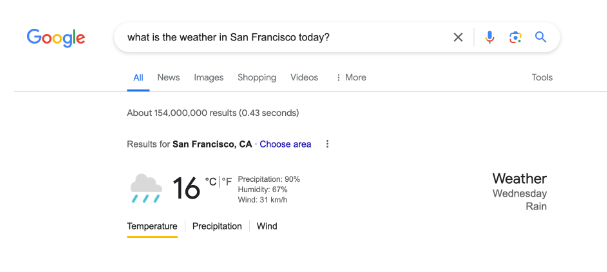